# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

**Part 1 Observable Trends:**
1. When pulling random cities from the OpenWeatherMap API and looking at its data, you can see that the weather conditions in the North appear more harsh in comparison to the South. The max temperature is highest at 0 latitude and begins to drop as the Latitude decreases.  
2. You can also see that there appears to be more humidity in some areas of the world, particularly above 40 degrees Latitude.
3. When looking at the relationship between City Latitude and Wind Speed, it appears to show that there isn't really high wind speeds all across the globe.  Many of the wind speeds are less than 15 mph.  For the parts of the world that are between 0-80 degrees Latitude, most of their wind speeds are under 10 mph.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:\\Users\\klsis\\Google Drive\\Homework\\python-api-challenge\\Instructions\\output_data\\cities.csv"

np.random.seed(1)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
import datetime

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))

644


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Url
url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [5]:
requests.get(url+cities[0]).json()

{'coord': {'lon': -134.97, 'lat': -23.12},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 74.71,
  'feels_like': 74.08,
  'temp_min': 74.71,
  'temp_max': 74.71,
  'pressure': 1018,
  'humidity': 83,
  'sea_level': 1018,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 13.96, 'deg': 321},
 'clouds': {'all': 97},
 'dt': 1603908653,
 'sys': {'country': 'PF', 'sunrise': 1603894586, 'sunset': 1603941035},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [6]:
dict = {'City': [],'Lat': [], 'Lng': [], 'Max Temp':[], 'Humidity':[], 'Cloudiness':[], 'Wind Speed':[], 'Country':[], 'Date':[]}
set_count = 0

print('''
--------------------------------------
Beginning Data Retrieval
--------------------------------------''')

# use iterrows to iterate through pandas dataframe
for city in cities:
    #Run a request and convert to json
    weather_check = requests.get(url + city)
    weather_json = weather_check.json()

    #Try and catch
    try:
        dict['Lat'].append(weather_json['coord']['lat'])
        dict['Lng'].append(weather_json['coord']['lon'])
        dict['Max Temp'].append(weather_json['main']['temp_max'])
        dict['Humidity'].append(weather_json['main']['humidity'])
        dict['Cloudiness'].append(weather_json['clouds']['all'])
        dict['Wind Speed'].append(weather_json['wind']['speed'])
        dict['Country'].append(weather_json['sys']['country'])
        dict['Date'].append(weather_json['dt'])
        dict['City'].append(city)
        set_count +=1
        print(f'Processing record {set_count} {city}')
              
    except (KeyError, IndexError):
        print("City not found/Skipping...")
        
print('''
--------------------------------------
Data Retrieval Complete
--------------------------------------''')


--------------------------------------
Beginning Data Retrieval
--------------------------------------
Processing record 1 rikitea
Processing record 2 parsabad
Processing record 3 port alfred
Processing record 4 arraial do cabo
Processing record 5 mataura
Processing record 6 hermanus
Processing record 7 cape town
Processing record 8 geraldton
Processing record 9 pisco
Processing record 10 acarau
Processing record 11 puerto ayora
Processing record 12 uruzgan
Processing record 13 dunedin
Processing record 14 yellowknife
Processing record 15 albany
Processing record 16 bryan
Processing record 17 avarua
Processing record 18 atuona
Processing record 19 bluff
Processing record 20 new norfolk
Processing record 21 chapais
Processing record 22 cherskiy
Processing record 23 esperance
Processing record 24 vila franca do campo
Processing record 25 hofn
City not found/Skipping...
Processing record 26 vaini
Processing record 27 punta arenas
Processing record 28 provideniya
City not found/Skipping..

Processing record 247 ahipara
Processing record 248 puerto carreno
Processing record 249 victoria
Processing record 250 lagos
Processing record 251 hofu
Processing record 252 belem de sao francisco
Processing record 253 esmeralda
Processing record 254 sesori
Processing record 255 zambezi
Processing record 256 suntar
Processing record 257 lavrentiya
Processing record 258 portland
Processing record 259 richards bay
Processing record 260 saint-marc
Processing record 261 namibe
Processing record 262 algiers
Processing record 263 necochea
Processing record 264 dawei
Processing record 265 castro
Processing record 266 esmeraldas
Processing record 267 airai
Processing record 268 mangrol
Processing record 269 komsomolskiy
Processing record 270 porto walter
Processing record 271 ulaanbaatar
Processing record 272 hauge
Processing record 273 nuevo progreso
Processing record 274 doha
Processing record 275 puerto narino
Processing record 276 roma
Processing record 277 touros
Processing record 278 pr

Processing record 494 adre
Processing record 495 buin
Processing record 496 salalah
Processing record 497 san carlos de bariloche
Processing record 498 loanda
Processing record 499 rawson
Processing record 500 ginda
Processing record 501 monterey
Processing record 502 smoky lake
Processing record 503 carballo
Processing record 504 kendari
City not found/Skipping...
Processing record 505 son la
Processing record 506 emba
Processing record 507 plymouth
City not found/Skipping...
Processing record 508 broceni
Processing record 509 najran
Processing record 510 prince rupert
Processing record 511 tambopata
Processing record 512 athabasca
Processing record 513 gamba
Processing record 514 eureka
Processing record 515 nichinan
Processing record 516 naifaru
Processing record 517 hamilton
Processing record 518 krasnoselkup
Processing record 519 santo augusto
Processing record 520 taoudenni
Processing record 521 zheleznodorozhnyy
Processing record 522 belyy yar
Processing record 523 ducheng
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Make dict into a DataFrame
city_data = pd.DataFrame(dict)

# Export file to a csv and display into a DataFrame
city_data.to_csv(output_data_file)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,74.71,83,97,13.96,PF,1603908653
1,parsabad,39.65,47.92,53.60,87,20,4.83,IR,1603908659
2,port alfred,-33.59,26.89,64.17,89,63,0.63,ZA,1603908659
3,arraial do cabo,-22.97,-42.03,93.20,70,0,12.75,BR,1603908659
4,mataura,-46.19,168.86,48.00,89,93,3.00,NZ,1603908659


In [8]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,20.387012,15.163706,60.029549,71.769616,51.148581,8.006327,1.603909e+09
std,32.741704,88.231872,22.180452,21.016804,37.962615,5.636830,6.730028e+01
min,-54.800000,-175.200000,-9.990000,5.000000,0.000000,0.470000,1.603908e+09
25%,-6.530000,-65.345000,45.000000,60.500000,10.000000,4.000000,1.603909e+09
50%,22.930000,18.960000,64.400000,77.000000,55.000000,6.220000,1.603909e+09
75%,47.955000,91.450000,77.720000,88.000000,90.000000,11.365000,1.603909e+09
max,78.220000,178.420000,100.180000,100.000000,100.000000,38.030000,1.603909e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity is greater than 100%.
humidity_count = city_data.loc[city_data["Humidity"] >= 101].index
humidity_count

Int64Index([], dtype='int64')

Had 0 cities that had humidity greater than 100% so skipping where need to duplicate them.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
date_month = datetime.date.fromtimestamp(dict['Date'][0]).month
date_day = datetime.date.fromtimestamp(dict['Date'][0]).day
day_year = datetime.date.fromtimestamp(dict['Date'][0]).year

date = str(date_month) + "/" + str(date_day) + "/" + str(day_year)
date

'10/28/2020'

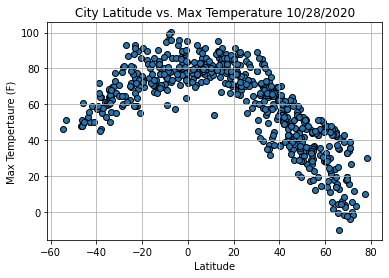

In [45]:
#Create a scatterplot on Latitude vs Temperature
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor='black')

#Set a Title and Labels
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Tempertaure (F)")
plt.grid()
plt.savefig("City Latitude vs. Max Temperature.png")

#Display scatterplot
plt.show()

The data shows a curved pattern as you move from left to right when looking at the relationship between City Latitude and Max Temperature.  It seems to tell me that depending on where you are located in the world, your max temperatures are either hotter or colder. For example, the max temperature is highest at 0 latitude.

## Latitude vs. Humidity Plot

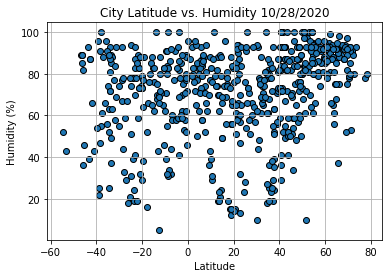

In [46]:
#Create a scatterplot on Latitude vs Humidity
plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor='black')

#Set a Title and Labels
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("City Latitude vs. Humidity.png")

#Display scatterplot
plt.show()

When looking at the relationship between City Latitude and Humidity, you can see that there appears to be more humidity in areas of the world particularly above 40 degrees Latitude.  There appears to be a heavier cluster when the latitude increases.

## Latitude vs. Cloudiness Plot

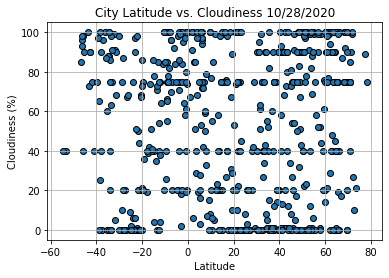

In [47]:
#Create a scatterplot on Latitude vs Cloudiness
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor='black')

#Set a Title and Labels
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("City Latitude vs. Cloudiness.png")


#Display scatterplot
plt.show()

When looking a the data on the relationship between City Latitude and Cloudiness, the data is very spread out.  This tells me that it doesn't matter where you live in the world, there are clouds.

## Latitude vs. Wind Speed Plot

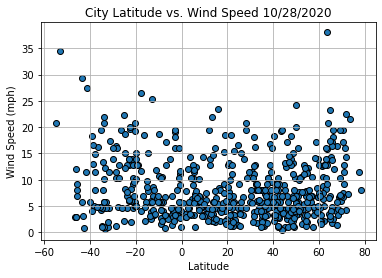

In [48]:
#Create a scatterplot on Latitude vs Wind Speed
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor='black' )

#Set a Title and Labels
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("City Latitude vs. Wind Speed.png")

#Display scatterplot
plt.show()

When looking at the relationship between City Latitude and Wind Speed, it appears to show that there isn't really high wind speeds all over the world.  Many of the wind speeds are less than 15 mph and for the parts of the world that are between 0-80 degrees Latitude, most of their wind speeds are under 10 mph.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
#Create dataframes for northern and southern hemispheres
northern_hemi_df = city_data.loc[(city_data["Lat"] >= 0)]
southern_hemi_df = city_data.loc[(city_data["Lat"] < 0)]

The r-value is: 0.7590843836656064


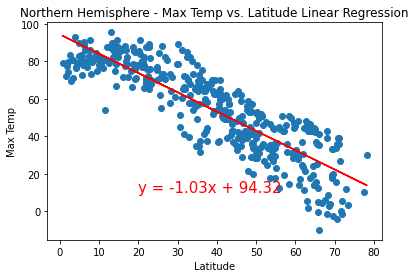

In [24]:
#X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")


# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Southern Hemisphere Max Temp vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", you can see that there is a  strong negative correlation between max temperature and latitude linear regression in the Northern Hemisphere. The scatterplot shows the data moving in the same direction and with a correlation coefficient at 0.76.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49735798590984015


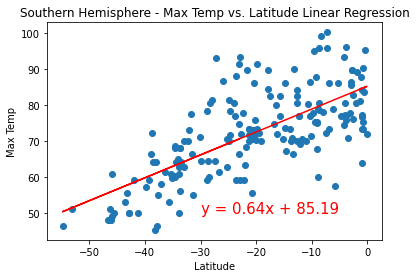

In [40]:
#X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Southern Hemisphere Max Temp vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", you can see that there is a moderate uphill (positive) relationship between max temperature and latitude linear regression in the Southern Hemisphere. The scatterplot shows the data moving in the same direction and with a correlation coefficient at 0.50.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09006208060529342


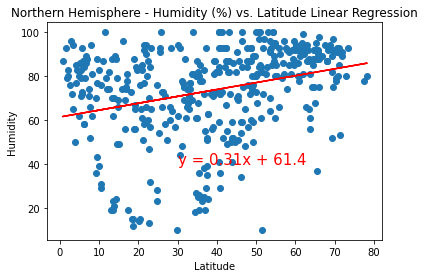

In [26]:
#X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red")

# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Northern Hemisphere Humidity (%) vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", you can see that there is no correlation between humidity and latitude linear regression in the Northern Hemisphere. The scatterplot shows the data all over the place with a slight cluster up near the top of the graph and with a correlation coefficient at 0.10.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.003576584490194641


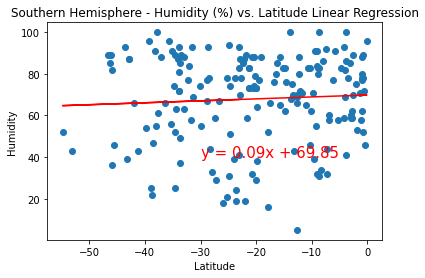

In [38]:
#X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Southern Hemisphere Humidity (%) vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", you can see that there is no no correlation between humidity and latitude linear regression in the Southern Hemisphere. The scatterplot shows the data all over the place and with a correlation coefficient at 0.00.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02327258354608273


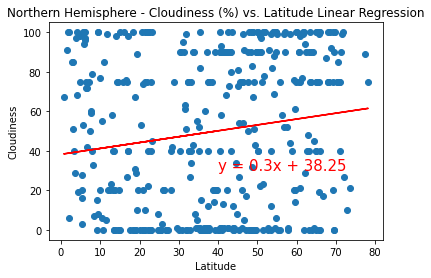

In [31]:
#X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Northern Hemisphere Cloudiness (%) vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", you can see that there is no correlation between cloudiness and latitude linear regression in the Northern Hemisphere. The scatterplot shows the data all over the place and with a correlation coefficient at 0.02.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003939433846492451


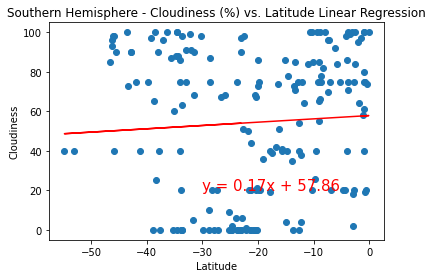

In [33]:
#X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")

# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Southern Hemisphere Cloudiness (%) vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", you can see that there is no correlation between cloudiness and latitude linear regression in the Southern Hemisphere. The scatterplot shows the data all over the place and with a correlation coefficient at 0.00.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02967859641419763


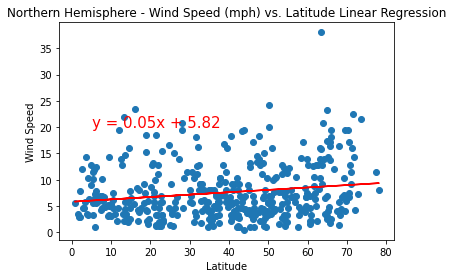

In [35]:
#X and Y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")

# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Northern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", you can see that there is no correlation between wind speed and latitude linear regression in the Northern Hemisphere. The scatterplot shows the data all over the place with a slight cluster showing many plots below 10 mph wind speeds towards the bottom of the graph and with a correlation coefficient at 0.03.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.047643700068303346


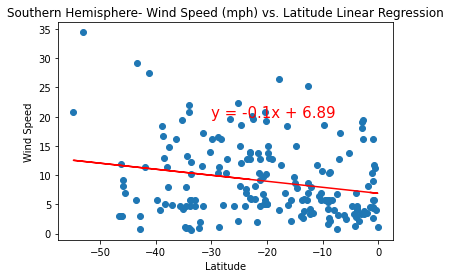

In [37]:
#X and Y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regressiom 
(slope, intercept, rvalue, pvalue, stderr)  = linregress(x_values, y_values)

#Get regression values
regress_values = x_values*slope + intercept

#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 20),fontsize=15,color="red")

# Set labels and title    
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("Southern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression.png")

#Display plot 
plt.show()

When looking at the output of "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", you can see that there is no correlation between wind speed and latitude linear regression in the Southern Hemisphere. The scatterplot shows the data all over the place and with a correlation coefficient at 0.05.